## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_units, activation="softmax", name = "output_layer")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-2
Epochs = 50
Batch_szie = 256
Momentum = [0.5, 0.7, 0.9]
Nesterov = [True, False]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in Momentum:
    for N_status in Nesterov:
        keras.backend.clear_session() #清除舊圖
        print("Experiment with MM=%.2f, & N=%s " %(mm, N_status))
        model = build_mlp(input_shape = x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr = Learning_rate, 
                                         nesterov=N_status,
                                         momentum = mm)
        model.compile(loss = "categorical_crossentropy",
                      metrics = ["accuracy"],
                      optimizer = optimizer)
        model.fit(x_train, y_train,
                  epochs = Epochs,
                  batch_size = Batch_szie,
                  validation_data = (x_test, y_test),
                  shuffle = True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-mm-%s-N-%s" %(str(mm) , str(N_status))
        results[exp_name_tag] = {"train-loss": train_loss,
                                 "valid-loss": valid_loss,
                                 "train-acc": train_acc,
                                 "valid-acc": valid_acc}
    




Experiment with MM=0.50, & N=True 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 13ms/step - loss: 

196/196 [==============================] - 2s 11ms/step - loss: 1.0213 - accuracy: 0.6443 - val_loss: 1.3965 - val_accuracy: 0.5080
Experiment with MM=0.50, & N=False 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________

Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0056 - accuracy: 0.6444 - val_loss: 1.3425 - val_accuracy: 0.5319
Experiment with MM=0.70, & N=True 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params:

196/196 [==============================] - 3s 13ms/step - loss: 0.8557 - accuracy: 0.7026 - val_loss: 1.4394 - val_accuracy: 0.5192
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8566 - accuracy: 0.7010 - val_loss: 1.4267 - val_accuracy: 0.5248
Experiment with MM=0.70, & N=False 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output

Epoch 49/50
196/196 [==============================] - 3s 14ms/step - loss: 0.8316 - accuracy: 0.7077 - val_loss: 1.5711 - val_accuracy: 0.5067
Epoch 50/50
196/196 [==============================] - 3s 14ms/step - loss: 0.8180 - accuracy: 0.7135 - val_loss: 1.3903 - val_accuracy: 0.5361
Experiment with MM=0.90, & N=True 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

196/196 [==============================] - 2s 12ms/step - loss: 0.5048 - accuracy: 0.8208 - val_loss: 2.2426 - val_accuracy: 0.4804
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.4498 - accuracy: 0.8391 - val_loss: 1.9215 - val_accuracy: 0.5263
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.4255 - accuracy: 0.8503 - val_loss: 1.9391 - val_accuracy: 0.5344
Experiment with MM=0.90, & N=False 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________________

196/196 [==============================] - 3s 15ms/step - loss: 0.6122 - accuracy: 0.7812 - val_loss: 1.6677 - val_accuracy: 0.5264
Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 0.6261 - accuracy: 0.7754 - val_loss: 1.6554 - val_accuracy: 0.5207
Epoch 49/50
196/196 [==============================] - 3s 13ms/step - loss: 0.6015 - accuracy: 0.7850 - val_loss: 1.6533 - val_accuracy: 0.5428
Epoch 50/50
196/196 [==============================] - 3s 14ms/step - loss: 0.5912 - accuracy: 0.7892 - val_loss: 1.6645 - val_accuracy: 0.5277


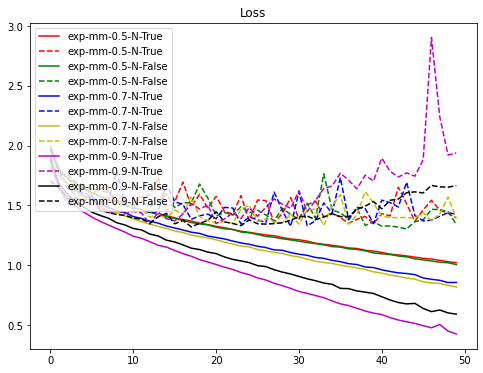

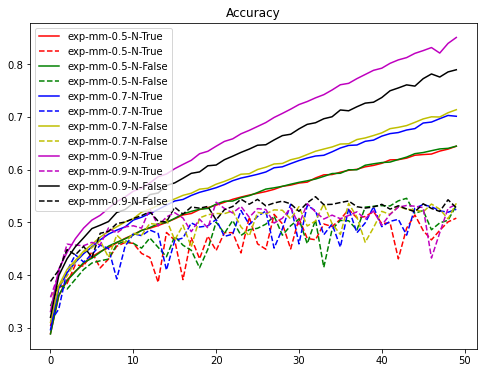

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--",  label = cond, c = color_bar[i])
plt.title("Loss")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label = cond, c = color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
